> ## 데이터 청년 캠퍼스 16일차 과제
> ### <b>노재혁</b>

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def acc_mse(y_test, model):
    print(f'<정확도 : {accuracy_score(y_test, model):.4f}>\n<MSE : {mean_squared_error(y_test, model):.4f}>\n')

### Voting
#### 1. iris 

In [3]:
# hard voting, soft voting
iris = datasets.load_iris()
x_df = pd.DataFrame(iris.data, columns=iris.feature_names)
y_df = pd.DataFrame(iris.target, columns=['target'])

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size=0.2,
                                                   random_state=121)

lr_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors=5)

hvot_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='hard')
hvot_clf.fit(x_train, y_train)

svot_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
svot_clf.fit(x_train, y_train)

pred_hvot = hvot_clf.predict(x_test)
pred_svot = svot_clf.predict(x_test)

In [4]:
acc_mse(y_test, pred_hvot)
acc_mse(y_test, pred_svot)

<정확도 : 0.9667>
<MSE : 0.0333>

<정확도 : 0.9667>
<MSE : 0.0333>



#### 2. Personal Loan
- "Personal Loan.csv"

In [5]:
# hard voting, soft voting
loan = pd.read_csv('data/Personal Loan.csv')
x_df = loan.copy()
x_df.drop(['ID', 'Personal Loan'], axis=1, inplace=True)
y_df = loan['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df,
                                                   test_size=0.2,
                                                   random_state=121)

lr_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier(n_neighbors=5)

hvot_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='hard')
hvot_clf.fit(x_train, y_train)

svot_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
svot_clf.fit(x_train, y_train)

pred_hvot = hvot_clf.predict(x_test)
pred_svot = svot_clf.predict(x_test)

In [6]:
acc_mse(y_test, pred_hvot)
acc_mse(y_test, pred_svot)

<정확도 : 0.9140>
<MSE : 0.0860>

<정확도 : 0.9060>
<MSE : 0.0940>



### Bagging
#### 1. iris 

In [7]:
# Dataset
iris = datasets.load_iris()
x_df = pd.DataFrame(iris.data, columns=iris.feature_names)
y_df = pd.DataFrame(iris.target, columns=['target'])

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size=0.2)

# LR
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(x_train, y_train)

pred_lr = lr_clf.predict(x_test)

In [8]:
# LR 결과
acc_mse(y_test, pred_lr)

<정확도 : 0.9667>
<MSE : 0.0333>



In [9]:
# LR bagging
bag_clf = BaggingClassifier(base_estimator = lr_clf,
                           n_estimators=5,
                           verbose=1)

lr_clf_bag = bag_clf.fit(x_train, y_train)
pred_lr_bag = lr_clf_bag.predict(x_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [10]:
# LR bagging 결과
acc_mse(y_test, pred_lr_bag)

<정확도 : 0.9667>
<MSE : 0.0333>



In [11]:
# DT

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
pred_dt = dt_clf.predict(x_test)

In [12]:
acc_mse(y_test, pred_dt)

<정확도 : 0.9667>
<MSE : 0.0333>



In [13]:
# DT bagging
bag_dt_clf = BaggingClassifier(base_estimator=dt_clf,
                              n_estimators=5,
                              verbose=1)

bag_dt_clf.fit(x_train, y_train)
pred_dt_bag = bag_dt_clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [14]:
acc_mse(y_test, pred_dt_bag)

<정확도 : 0.9667>
<MSE : 0.0333>



#### 2. Personal Loan
- "Personal Loan.csv"

In [15]:
# Personal Loan Dataset
loan = pd.read_csv('data/Personal Loan.csv')
x_df = loan.copy()
x_df.drop(['ID', 'Personal Loan'], axis=1, inplace=True)
y_df = loan['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df,
                                                   test_size=0.2)

In [16]:
# LR bagging
lr_clf = LogisticRegression(max_iter=10000)
bag_clf = BaggingClassifier(base_estimator = lr_clf,
                           n_estimators=5,
                           verbose=1)

lr_clf_bag = bag_clf.fit(x_train, y_train)
pred_lr_bag = lr_clf_bag.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [17]:
acc_mse(y_test, pred_lr_bag)

<정확도 : 0.9240>
<MSE : 0.0760>



In [18]:
# DT bagging
bag_dt_clf = BaggingClassifier(base_estimator=dt_clf,
                              n_estimators=5,
                              verbose=1)

bag_dt_clf.fit(x_train, y_train)
pred_dt_bag = bag_dt_clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [19]:
acc_mse(y_test, pred_dt_bag)

<정확도 : 0.9860>
<MSE : 0.0140>



### RandomForest
#### 1. iris 

In [20]:
# Dataset
iris = datasets.load_iris()
x_df = pd.DataFrame(iris.data, columns=iris.feature_names)
y_df = pd.DataFrame(iris.target, columns=['target'])

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size=0.2)

In [21]:
# Random Forest GridSearchCV
params = {'n_estimators' : [10, 100, 500, 1000],
         'max_depth' : [3, 5, 10, 15]}

rf_clf = RandomForestClassifier(random_state=121,
                                n_jobs=-1,
                               verbose=1)

grid_cv = GridSearchCV(rf_clf,
                      param_grid=params,
                      n_jobs=-1,
                      verbose=1)
grid_cv.fit(x_train, y_train)

print(f'최적 하이퍼 파라미터: {grid_cv.best_params_}')
print(f'최고 예측 정확도: {grid_cv.best_score_:.4f}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


최적 하이퍼 파라미터: {'max_depth': 3, 'n_estimators': 100}
최고 예측 정확도: 0.9500


#### 2. Personal Loan
- "Personal Loan.csv"

In [22]:
loan = pd.read_csv('data/Personal Loan.csv')
x_df = loan.copy()
x_df.drop(['ID', 'Personal Loan'], axis=1, inplace=True)
y_df = loan['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df,
                                                   test_size=0.2)

In [23]:
# Random Forest GridSearchCV
params = {'n_estimators' : [10, 100, 500, 1000],
         'max_depth' : [3, 5, 10, 15]}

rf_clf = RandomForestClassifier(random_state=121,
                                n_jobs=-1,
                               verbose=1)

grid_cv = GridSearchCV(rf_clf,
                      param_grid=params,
                      n_jobs=-1,
                      verbose=1)
grid_cv.fit(x_train, y_train)

print(f'최적 하이퍼 파라미터: {grid_cv.best_params_}')
print(f'최고 예측 정확도: {grid_cv.best_score_:.4f}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   25.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.9s


최적 하이퍼 파라미터: {'max_depth': 15, 'n_estimators': 1000}
최고 예측 정확도: 0.9800


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


### Gradient boosting
#### Personal Loan

In [24]:
# Personal Loan Dataset
loan = pd.read_csv('data/Personal Loan.csv')
x_df = loan.copy()
x_df.drop(['ID', 'Personal Loan'], axis=1, inplace=True)
y_df = loan['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df,
                                                   test_size=0.2)

- #### Gradient boost

In [25]:
# GB
gb_clf = GradientBoostingClassifier(n_estimators=30, random_state=121)

gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)

In [26]:
acc_mse(y_test, gb_pred)

<정확도 : 0.9880>
<MSE : 0.0120>



In [27]:
# GB GridSearchCV
params = {'learning_rate': [0.01, 0.05, 0.1],
          'n_estimators' : [10, 20, 30, 40, 50],
          'max_depth': [3, 5, 7, 9]}


gb_clf = GradientBoostingClassifier()

grid_cv = GridSearchCV(gb_clf,
                      param_grid=params,
                      n_jobs=-1,
                      verbose=1)
grid_cv.fit(x_train, y_train)

print(f'최적 하이퍼 파라미터: {grid_cv.best_params_}')
print(f'최고 예측 정확도: {grid_cv.best_score_:.4f}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s


최적 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
최고 예측 정확도: 0.9820


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.9s finished


- #### XGboost

In [28]:
# Dataset and Param
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

xgb_param = {'max_depth': 3,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss'}

wlist = [(dtrain, 'train'), (dtest, 'eval')]

# model fitting
xgb_model = xgb.train(params=xgb_param, dtrain=dtrain, evals=wlist)
xgb_model_predict = xgb_model.predict(dtest)

[0]	train-logloss:0.454229	eval-logloss:0.450877
[1]	train-logloss:0.323187	eval-logloss:0.318401
[2]	train-logloss:0.240715	eval-logloss:0.232936
[3]	train-logloss:0.1839	eval-logloss:0.178248
[4]	train-logloss:0.14533	eval-logloss:0.142266
[5]	train-logloss:0.116919	eval-logloss:0.113453
[6]	train-logloss:0.097379	eval-logloss:0.094698
[7]	train-logloss:0.083236	eval-logloss:0.081287
[8]	train-logloss:0.07353	eval-logloss:0.071742
[9]	train-logloss:0.065023	eval-logloss:0.064502


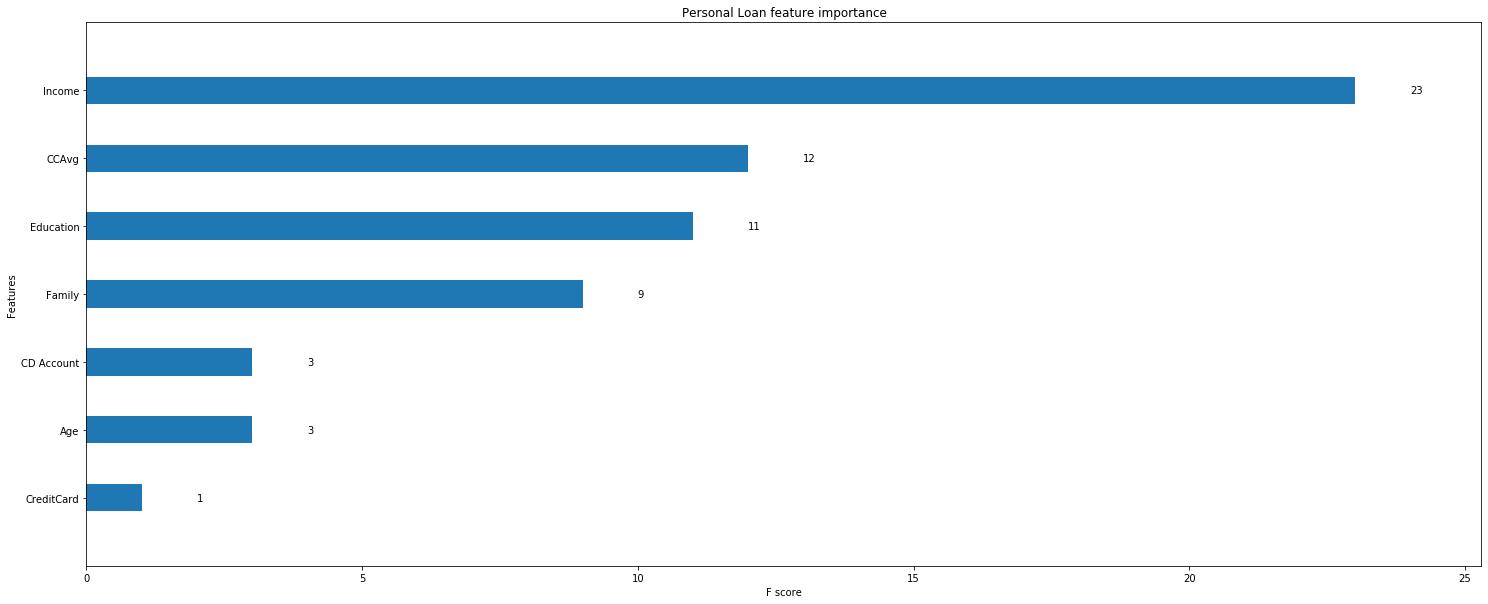

In [40]:
# feature importance
fig, ax = plt.subplots(figsize=(25, 10))
xgb.plot_importance(xgb_model, ax=ax, height=0.4, title='Personal Loan feature importance', grid=0)

In [30]:
# step function
preds = [1 if x > 0.5 else 0 for x in xgb_model_predict]
acc_mse(y_test, preds)

<정확도 : 0.9880>
<MSE : 0.0120>



- #### LightGBM

In [31]:
# LGBM fitting
lgbm_wrapper = LGBMClassifier()
evals = [(x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(x_test)

[1]	valid_0's binary_logloss: 0.220356
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.190132
[3]	valid_0's binary_logloss: 0.169186
[4]	valid_0's binary_logloss: 0.152662
[5]	valid_0's binary_logloss: 0.138473
[6]	valid_0's binary_logloss: 0.126656
[7]	valid_0's binary_logloss: 0.116806
[8]	valid_0's binary_logloss: 0.107796
[9]	valid_0's binary_logloss: 0.100057
[10]	valid_0's binary_logloss: 0.0932733
[11]	valid_0's binary_logloss: 0.0878413
[12]	valid_0's binary_logloss: 0.0827333
[13]	valid_0's binary_logloss: 0.0785495
[14]	valid_0's binary_logloss: 0.0745012
[15]	valid_0's binary_logloss: 0.0708538
[16]	valid_0's binary_logloss: 0.0679505
[17]	valid_0's binary_logloss: 0.0651343
[18]	valid_0's binary_logloss: 0.0625894
[19]	valid_0's binary_logloss: 0.0602107
[20]	valid_0's binary_logloss: 0.057517
[21]	valid_0's binary_logloss: 0.0556222
[22]	valid_0's binary_logloss: 0.0535132
[23]	valid_0's binary_logloss: 0.0516202
[24]	valid_0's

In [32]:
acc_mse(y_test, preds)

<정확도 : 0.9880>
<MSE : 0.0120>

